# How are trading volume and volatility related for energy stocks?

## Goals

By the end of this case, we will have introduced the `pandas` library within Python. You will also have gained experience with the `numpy` library, know how to read data files, and conduct descriptive statistics.

You should also begin to develop a proper mindset for investigating the library on your own, via documentation or other resources such as StackOverflow. Self-research of existing documentation is a crucial part of developing as a data professional.

## Introduction

**Business Context.** You are an analyst at a large bank focused on natural resource stock investments. Natural resources are vital for a variety of industries in our economy. Recently, your division has taken interest in the following stocks:

1. Dominion Energy Inc.
2. Exelon Corp.
3. NextEra Energy Inc.
4. Southern Co.
5. Duke Energy Corp.

These stocks are all part of the energy sector, an important but volatile sector of the stock market. (A stock is considered volatile if its price exhibits large percentage changes day-to-day.) While high volatility increases the chance of great gains, it also makes it more likely to incur large losses, so risk must be managed carefully when investing in high-volatility stocks.

Because your firm is quite large, there must be enough trading volume (average amount of shares transacted per day) so that it can easily transact in these stocks. Otherwise, this effect compounded with the stocks' naturally high volatility could make these too risky for the bank to invest in. A stock with higher trading volume is easier to buy or sell quickly, which is extremely important in a volatile market.

**Business Problem.** Given that both low trading volume and high volatility present risks to your investments, your team lead asks you to investigate the following: **"How is the volatility of energy stocks related to their average daily trading volume?"**

**Analytical Context.** The data you've been given is in the [Comma Separated Value (CSV) format](https://frictionlessdata.io/docs//), and comprises price and trading volume data for the above stocks. This case begins with a brief overview of this data, after which you will: (1) learn how to use the Python library [pandas](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673) to load the data; (2) use ```pandas``` transform this data into a form amenable for analysis; and finally (3) use ```pandas``` to analyze the above question and come to a conclusion. As you may have guessed, ```pandas``` is an enormously useful library for data analysis and manipulation.

In [3]:
simple_var = 5

In [4]:
simple_var

5

## Importing packages to aid in data analysis

[External libraries (a.k.a. packages)](https://www.learnpython.org/en/Modules_and_Packages) are code bases that contain a variety of pre-written functions and tools. This allows you to perform a variety of complex tasks in Python without having to "reinvent the wheel" build everything from the ground up. We will use two core packages: ```pandas``` and ```numpy```.

```pandas``` is an external library that provides functionality for data analysis. Pandas specifically offers a variety of data structures and data manipulation methods that allow you to perform complex tasks with simple, one-line commands.

```numpy``` is a package that we will use later in the case that offers numerous mathematical operations. Together, [pandas](https://pandas.pydata.org/pandas-docs/stable/whatsnew/v1.0.0.html) and [numpy](https://numpy.org/) allow you to create a data science workflow within Python. `numpy` is in many ways foundational to `pandas`, providing vectorized operations, while `pandas` provides higher level abstractions built on top of `numpy`.</font>

Let's import both packages using the ```import``` keyword. We will rename ```pandas``` to ```pd``` and ```numpy``` to ```np``` using the ```as``` keyword. This allows us to use the short name abbreviation when we want to reference any function that is inside either package. The abbreviations we chose are standard across the data science industry and should be followed unless there is a very good reason not to.

In [5]:
# Import the Pandas package
import pandas as pd

# Import the NumPy package
import numpy as np

Now that these packages are loaded into Python, we can use their contents. Let's first take a look at ```pandas``` as it has a variety of features we will use to load and analyze our stock data.

## Fundamentals of ```pandas```

`pandas` is a Python library that facilitates a wide range of data analysis and manipulation. Before, you saw basic data structures in Python such as lists and dictionaries. While you can build a basic data table (similar to an Excel spreadsheet) using nested lists in Python, they get quite difficult to work with. By contrast, in `pandas` the table data structure, known as a `DataFrame`, is a first-class citizen and you can easily manipulate your data thinking of it in rows and columns.

If you've ever used or heard of R or SQL before, `pandas` brings some functionality from each of these to Python, allowing you to structure and filter data more efficiently than pure Python. This efficiency is seen in two distinct ways:

* Scripts written using `pandas` will often run faster than scripts written in pure Python
* Scripts written using `pandas` will often contain far fewer lines of code than the equivalent script written in pure Python.

At the core of the ```pandas``` library are two fundamental data structures/objects:
1. [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)
2. [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

A ```Series``` object stores single-column data along with an **index**. An index is just a way of "numbering" the ```Series``` object. For example, in this case study, the indices will be dates, while the single-column data may be stock prices or daily trading volume.

A ```DataFrame``` object is a two-dimensional tabular data structure with labeled axes. It is conceptually helpful to think of a DataFrame object as a collection of Series objects. Namely, think of each column in a DataFrame as a single Series object, where each of these Series objects shares a common index -  the index of the DataFrame object.

The following diagrams show the differences between a Series and a DataFrame. This is a DataFrame (notice that it has an index for its columns and an index for its rows):

<img src="data/images/dataframe.jpg" alt="A Dataframe" style="width: 500px;"/>

If you *slice* a DataFrame to extract just **one** column, you'll get a Series. Series can be created independently as well. This is a Series (Series objects always have a row index):

<img src="data/images/series.jpg" alt="A Series" style="width: 600px;"/>

Series don't have column indexes, because they don't have columns. You can, however, give your Series a name. Below is the syntax for creating a Series object, followed by the syntax for creating a DataFrame object. Note that DataFrame objects can also have a single-column – think of this as a DataFrame consisting of a single Series object (they might contain the same information, but are still distinct objects and are treated as such by `pandas`):

In [6]:
# Create a simple Series object
simple_series = pd.Series(
    index=[0, 1, 2, 3], # The index
    name="Volume", # The name
    data=[1000, 2600, 1524, 98000] # The data
)
simple_series

0     1000
1     2600
2     1524
3    98000
Name: Volume, dtype: int64

You'll notice that this Series is of `dtype` (data type) `int64`, which means its data cells contain integers.

By changing ```pd.Series``` to ```pd.DataFrame```, and adding a columns input list, a DataFrame object can be created:

In [7]:
# Create a simple DataFrame object
simple_df = pd.DataFrame(
    index=[0, 1, 2, 3], # The index
    columns=["Volume"], # Your columns (must be inside a list object). AKA your column index.
    data=[1000, 2600, 1524, 98000] # Your data
)
simple_df

,Volume
0,1000
1,2600
2,1524
3,98000


DataFrame objects are more general than Series objects, and one DataFrame can hold many Series objects, each as a different column. Let's create a two-column DataFrame object:

In [ ]:
# Create another DataFrame object
another_df = pd.DataFrame(
    index=[0, 1, 2, 3], # The index
    columns=["Date", "Volume"], # Your columns (again, inside a list object). We will have 2 columns.
    data=[
          [20190101, 1000], # The data cells for the first row (row 0.) The cell for "Date" and then the cell for "Volume"
          [20190102, 2600], # Data cells for row 1
          [20190103, 1524], # Data cells for row 2
          [20190104, 98000] # Data cells for row 3
          ],
)
another_df

Notice how a list of lists was used to specify the data in the ```another_df``` DataFrame. Each element of the list corresponds to a row in the DataFrame, so the list has 4 elements because there are 4 row indices. Each element of the list of lists has 2 elements because the DataFrame has two columns.

## Using <code>pandas</code> to analyze stock data

Recall that we have CSV files that include data for each of the following stocks:

1. Dominion Energy Inc. (Stock Symbol: D)
2. Exelon Corp. (Stock Symbol: EXC)
3. NextEra Energy Inc. (Stock Symbol: NEE)
4. Southern Co. (Stock Symbol: SO)
5. Duke Energy Corp. (Stock Symbol: DUK)

The available data for each stock includes:

1. **Date:** The day of the year
2. **Open:** The stock opening price of the day
3. **High:** The highest observed stock price of the day
4. **Low:** The lowest observed stock price of the day
5. **Close:** The stock closing price of the day
6. **Adj Close:** The adjusted stock closing price for the day (adjusted for splits and dividends)
7. **Volume:** The volume of the stock traded over the day

To get a better sense of the available data, let's first take a look at just the data for Dominion Energy, listed on the New York Stock Exchange under the symbol D. You are given a CSV file that contains the company's stock data, ```D```. 

Recall that CSV files store tables using one CSV row per table row and separate the columns using commas (although other characters are possible, like semicolons):

<img src="data/images/csv.jpg" alt="A CSV file" style="width: 500px;"/>

`pandas` allows easy loading of CSV files through the use of the method [pd.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html):

In [8]:
# Load a file as a DataFrame and assign to the variable name df
df = pd.read_csv("data/D.csv")

The contents of the file ```D.csv``` are now stored in the DataFrame object ```df```.

There are several common methods and attributes available to take a peek at the data and get a sense of it:

1. ```DataFrame.head()```  -> returns the column names and first 5 rows by default
2. ```DataFrame.tail()```  -> returns the column names and last 5 rows by default
3. ```DataFrame.shape```   -> returns (num_rows, num_columns)
4. ```DataFrame.columns``` -> returns index of columns
5. ```DataFrame.index```   -> returns index of rows

In your spare time please check the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/) and explore the parameters of these methods as well as other methods. Familiarity with this library will dramatically improve your productivity as a data scientist.

Using ```df.head()``` and ```df.tail()``` we can take a look at the data contents. Unless specified otherwise, Series and DataFrame objects have indices starting at 0 and increase monotonically upward along the integers.

In [9]:
# Look at the head of the DataFrame (i.e. the top rows of the DataFrame)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800


In [10]:
# Look at the tail of the DataFrame (i.e. the last rows of the DataFrame)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2019-07-22,76.879997,76.930000,75.779999,76.260002,76.260002,2956500
1255,2019-07-23,76.099998,76.199997,75.269997,75.430000,75.430000,3175600
1256,2019-07-24,75.660004,75.720001,74.889999,75.180000,75.180000,3101900
1257,2019-07-25,75.150002,75.430000,74.610001,74.860001,74.860001,3417200
1258,2019-07-26,74.730003,75.349998,74.610001,75.150002,75.150002,3076500


Thus, we see there are 1259 data entries for Dominion Energy (remember that by default `pandas` indexes start with zero), each with 7 data points. The shape of a DataFrame is accessed using the ```shape``` attribute:

In [11]:
# Determine the shape of the two-dimensional structure, that is (num_rows, num_columns)
df.shape

(1259, 7)

It's important to note that ```DataFrame.columns``` and ```DataFrame.index``` return an index object instead of a list. These are, in fact, the column index and the row index of your DataFrame, respectively. To cast an index to a list for further list manipulation, we use the ```list()``` method:

In [12]:
# List of the column names of the DataFrame
list(df.columns)
# Run df.columns alone instead and see how the output differs. This time, the result would be an "Index" object.

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [13]:
# List of the row indexes of the DataFrame
list(df.index)[0:20]  # only showing first 20 index values to reduce screen output

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## Creating additional variables relevant to stock volatility

Oftentimes, the data provided to you will not be sufficient to achieve your goal. You may have to add additional variables or data features to assist you. Recall that our original question concerned the relationship between stock trading volume and volatility. Therefore, our DataFrame must have features related to both of these quantities.

It can be helpful to think about adding columns to DataFrames as adding adjacent columns one-by-one in Excel. Here is an example of how to do it:

In [14]:
# Add a new column named "Symbol"
df["Symbol"] = "D"
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D


In [15]:
# We can access a column by using [] brackets and the column name
df["Volume"].head() # added .head() to suppress output

0    1806400
1    2231100
2    2588900
3    3266900
4    2601800
Name: Volume, dtype: int64

In [16]:
# Add a new column named "Volume_Millions", which is calculated from the Volume column currently in df
# divide every row in df['Volume'] by 1 million, store in new column
df["Volume_Millions"] = df["Volume"] / 1000000
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D,1.8064
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D,2.2311
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D,2.5889
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D,3.2669
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D,2.6018


In [17]:
# Take a look at the updated DataFrame shape. Two new columns have been added.
df.shape

(1259, 9)

As discussed, we need to have a feature in our DataFrame that is related to volatility. Because this currently does not exist, we must create it from the already available features. Recall that volatility is a measure of the variability of daily returns over a period of time, so let's create a feature for daily returns. Daily returns are defined as the percentage gain or loss of a stock when comparing today's close price to the previous day's close price:

In [18]:
# Daily returns are the percentage change between today's close and the previous day's close
# To get the previous day's close, we use Series.shift(1) (this lags our series by one day)
df["Return"] = (df["Close"] / df["Close"].shift(1)) - 1.0 # We subtract 1 to make this a growth percentage. So, for instance, not 1.2 (120%) but 0.2 (20%). 

Let's create another statistical quantity to measure our volatility. Let's call it `VolStat`. This quantity takes the range of the price of each day (`High` - `Low`) rather than the difference between today's closing price and yesterday's closing price. This metric captures movements in the middle of each day, rather than just movements between days:

In [19]:
df["VolStat"] = (df["High"] - df["Low"]) / df["Open"]

Here we see the power of ```pandas```. We can simply perform mathematical operations on columns of DataFrames just as if the DataFrames were single variables themselves. Let's check the data:

In [20]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions,Return,VolStat
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D,1.8064,NaN,0.018781
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D,2.2311,-0.013403,0.014858
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D,2.5889,-0.013728,0.032286
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D,3.2669,-0.019284,0.018505
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D,2.6018,-0.000739,0.017674


Now we have features relevant to the original question, and can proceed to the analysis step. A common first step in data analysis is to learn about the **distribution** of the available data. The distribution refers to how the data is dispersed across all possible values that the data could take on. This will be made clear next.

## Learning about the data distribution through summary statistics

Let's take a simple example - suppose you have a list of ages taken from a survey you conducted among your friends. The ages are:

```
21, 30, 35, 40, 41, 45, 44, 44, 48, 43, 70
```

If you needed to summarize this set of numbers, you could group them in subsets (by tens for example; e.g. 20s, 30s, 40s, etc.) and count the number of numbers within each subset. In this example, the resulting *frequency table* would be:

| Group | Number of people |
| ------| -----------------|
20-29 | 1 |
30-39 | 2 |
40-49 | 7 |
50-59 | 0 |
60-69 | 0 |
70-79 | 1 |

So, instead of reciting the ages of your friends one-by-one every time someone asks you about them, you can simply report the frequency table and say "most of my friends are between 40 and 49 years old". When you make claims like this, you are describing the *distribution* of the available data across the subsets you have defined.

`pandas` has convenient functionality that allows you to easily create frequency tables and even plot them. Let's plot the distribution of `Volume_Millions`. We can use `pd.cut()` to calculate our frequency table:

In [21]:
# Let's define our bins (the boundaries of the subgroups)
bins = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] # These are given in millions of shares
freq  = pd.cut(df["Volume_Millions"], bins=bins) # This "cuts" the Volume_Millions Series into the bins
freq = freq.value_counts(sort=False) # Now we count the number of elements inside each bin. We use sort=False to avoid having our groups sorted by size
freq # The result is our frequency table. Freq is actually a Series in which the index is the bins and the data are the counts

(0, 1]        3
(1, 2]      266
(2, 3]      488
(3, 4]      266
(4, 5]      118
(5, 6]       60
(6, 7]       22
(7, 8]       13
(8, 9]        9
(9, 10]       7
(10, 11]      1
(11, 12]      2
(12, 13]      2
(13, 14]      1
(14, 15]      1
Name: Volume_Millions, dtype: int64

And then make a **histogram** of the table:

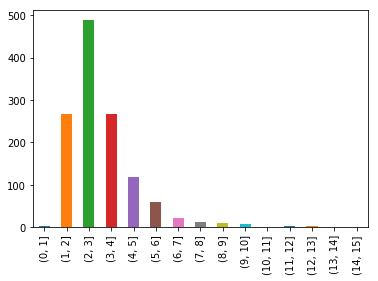

In [23]:
freq.plot.bar() # Since freq is a Series, we can use .plot.bar() to easily create a barplot

A histogram shows how many values in a particular dataset fall into any of several pre-defined "buckets". In this case, "buckets" represent the volume in millions and are. Instead of writing all the code above, you can alternatively use this nice one-liner:</font>

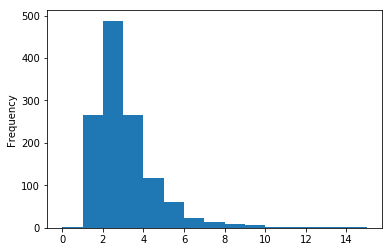

In [24]:
# This one doesn't have white space between the bars, which makes sense because the X axis does not have gaps!
# Since df["Volume_Millions"] is a series as well, we can use .plot.hist() to create a histogram.
df["Volume_Millions"].plot.hist(bins=bins) # Pandas computes the frequency table under the hood and plots it 

We can see that on most days, the traded volume is higher than 1 million but lower than 4 million. There are very few days with traded volume higher than 6 million.

While creating frequency tables and plotting them is useful, we sometimes want to have an even more summarized view of our data. For that, we compute **summary statistics**. You can think of your histogram is a summary of your raw data, and your summary statistics as a summary of the shape of your histogram.

Let's aggregate summary statistics for the five energy sector companies under study. Fortunately, the DataFrame and Series objects offer a myriad of data summary statistics methods:

1. ```min()```
2. ```max()```
3. ```mean()```
4. ```quantile()```
5. ```median()```

We can visualize the first three quantities using an example histogram (the underlying dataset is simply a bunch of random numbers):</font>

<img src="data/images/hist_min_max_mean.jpg" alt="Some summary statistics" style="width: 400px;"/>

`min` tells you what the minimum value in your dataset is, and `max` tells you what the maximum value is. The **[mean](https://www.mathgoodies.com/lessons/vol8/mean)** is a type of average that attempts to report the "center" of your distribution; i.e. the "center" of your histogram. If your data are mostly concentrated around the middle of the histogram (like in this example), then the mean is a very good summary of the "center" of the dataset; however, as you will see, this is not always the case.

Let's now compute and plot summary statistics for `Volume_Millions`. Notice how simple the functions are to apply to the DataFrame. Simply type the name of the DataFrame, followed by a ```.``` and then the method name you'd like to calculate. We've chosen to select a single column ```Volume_Millions``` from the DataFrame ```df```, but you could have just as easily called these methods on the full DataFrame rather than a single column:

In [25]:
# Calculate the minimum of the Volume_Millions column
df["Volume_Millions"].min()

0.73839999999999995

In [26]:
# Calculate the maximum of the Volume_Millions column
df["Volume_Millions"].max()

14.587400000000001

For the mean, we also plot the accompanying histogram:

Text(5,450,'The mean value is 3.08812930898')

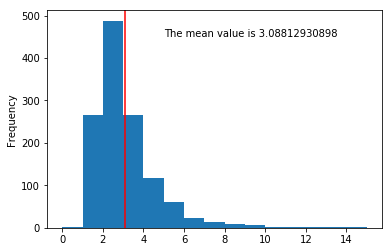

In [27]:
# Calculate the mean of the Volume_Millions column
the_mean = df["Volume_Millions"].mean()
ax = df["Volume_Millions"].plot.hist(bins=bins) # We save our plot to a variable called "ax"
ax.axvline(x=the_mean, color="red") # And then use the axvline method to add a vertical line at a desired point on the X axis
ax.text(x=5, y=450, s="The mean value is " + str(the_mean)) # We can add some text too

The mean attempts to describe where the "center" of the histogram is, with the hope that most (or at least a large chunk) of the data lies around that "center". Now, let's look at the **median** value of this dataset:

Text(5,350,'The median value is 2.7')

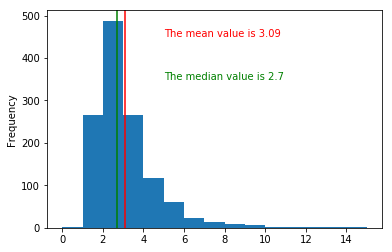

In [28]:
# Calculate the mean of the Volume_Millions column
the_mean = df["Volume_Millions"].mean()
the_mean = round(the_mean, 2) # Let's round it to make it more readable

# Calculate the median of the Volume_Millions column
the_median = df["Volume_Millions"].median()
the_median = round(the_median, 2) # Let's round it to make it more readable

ax = df["Volume_Millions"].plot.hist(bins=bins)
ax.axvline(x=the_mean, color="red")
ax.axvline(x=the_median, color="green")
ax.text(x=5, y=450, s="The mean value is " + str(the_mean), color="red")
ax.text(x=5, y=350, s="The median value is " + str(the_median), color="green")

Unlike the mean, the median gives the 50th percentile value in your dataset; i.e. the number such that half of the values in the dataset lie below it, and half of the values lie above it. When your distribution is symmetrical, your mean and median usually match. But when it is asymmetrical, like this one, they generally don't.

### Question:

In this scenario, does the mean or the median give a better summary of the "typical" value in the dataset? Why?

Finally, let's compute the `quantile` statistics. The `quantile()` function gives you the $X$-th percentile of your dataset; i.e. the value such that $X$ percent of your dataset is less than that value. The median is a classical case of this, where $X = 50$. As another example, a cutoff of $X = 25$ means that 25\% of your data are below the resulting value:

Text(5,450,'The 25% quantile is 2.0888')

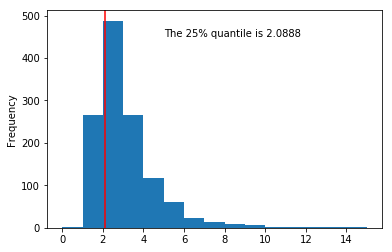

In [29]:
# Calculate the 25% quantile of the Volume_Millions column
the_25 = df["Volume_Millions"].quantile(0.25)
ax = df["Volume_Millions"].plot.hist(bins=bins)
ax.axvline(x=the_25, color="red")
ax.text(x=5, y=450, s="The 25% quantile is " + str(the_25))

### Exercise 1:

Write code to calculate and plot the 50\%, the 75\% and the 100\% quantiles. You'll see that the 50\% quantile and the *median* are one and the same, by definition. Also, the 100\% quantile is the same as the *maximum*.

**Answer.**

-------

Is there a more efficient method to quickly compute all of these summary statistics? Yes. One incredibly useful method that combines these summary statistics and also adds a couple others is the [describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method:

In [30]:
df['Volume_Millions'].describe()

count    1259.000000
mean        3.088129
std         1.548809
min         0.738400
25%         2.088800
50%         2.695700
75%         3.612850
max        14.587400
Name: Volume_Millions, dtype: float64

From this distribution analysis of the daily trading volume, we can see that more than 14 million shares would be a very large trading day, whereas below 2 million shares would be a relatively small trading day.

In addition to describe, there is a [value_counts() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) for checking the frequency of elements in categorical data. Please be aware that `value_counts()` is a method of the Series class and NOT the DataFrame class. This means you have to isolate a specific column of a DataFrame before calling `value_counts()`:

In [31]:
dict_data = {
    "numbers": [1, 2, 3, 4, 5, 6, 7, 8],
    "color": ["red", "red", "red", "blue", "blue", "green", "blue", "green"],
}
category_df = pd.DataFrame(data=dict_data)

category_df

,numbers,color
0,1,red
1,2,red
2,3,red
3,4,blue
4,5,blue
5,6,green
6,7,blue
7,8,green


In [ ]:
#why doesn't this work? (uncomment the expression that follows)
#category_df.value_counts()

In [32]:
# only Series objects can call this method (uncomment the following expression)
category_df['color'].value_counts()

blue     3
red      3
green    2
Name: color, dtype: int64

### Exercise 2:

Determine the 25th, 50th, and 75th percentile for the ```Open```, ```High```, ```Low```, and ```Close``` columns of ```df```.

**Answer.**

-------

## Aggregating data from multiple companies

So far, we've only been looking at data from one of our five companies. Let's go ahead and combine all five CSV files to analyze the five companies together. This will also reduce the amount of programming work required since the code will be shared across the five companies.

One way to accomplish this aggregation task is to use the [pd.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) method from ```pandas```. An input into this method may be a list of DataFrames that you'd like to concatenate. We will use a `for` loop to loop over each stock symbol, load the corresponding CSV file, and then append the result to a list which is later aggregated using ```pd.concat()```. Let's take a look at how this is done. We want to:

1. Load all the CSV files into `pandas` DataFrames.
2. Add a new column to each one of them with the respective symbol name to distinguish between stocks in the final DataFrame.
3. Combine all the DataFrames into one big DataFrame (we'll be using `pd.concat()` for that).
4. Create the `Volume_Millions`, `VolStat` and `Return` features in the concatenated DataFrame.

We can use a `for` loop to perform steps 1 and 2:

In [33]:
# Defining our stock symbols
symbol_data_to_load = ["D", "EXC", "NEE", "SO", "DUK"]
list_of_df = [] # An empty list that we'll be populating iteratively

# Looping over the symbols to load the dataframes
for symbol in symbol_data_to_load:
    # Load the CSV file
    temp_df = pd.read_csv("data/" + symbol + ".csv")
    
    # Add new column with symbol name to distinguish in final dataframe
    temp_df["Symbol"] = symbol
    list_of_df.append(temp_df) # Append the loaded DataFrame to the list

In [36]:
list_of_df

[            Date       Open       High        Low      Close  Adj Close  \
 0     2014-07-28  69.750000  71.059998  69.750000  70.879997  57.963978   
 1     2014-07-29  70.669998  70.980003  69.930000  69.930000  57.187099   
 2     2014-07-30  70.000000  70.660004  68.400002  68.970001  56.402020   
 3     2014-07-31  68.629997  68.849998  67.580002  67.639999  55.314388   
 4     2014-08-01  67.330002  68.410004  67.220001  67.589996  55.273487   
 5     2014-08-04  67.480003  67.589996  65.849998  67.029999  54.815529   
 6     2014-08-05  66.959999  67.089996  65.739998  66.010002  53.981419   
 7     2014-08-06  65.620003  65.699997  64.709999  64.910004  53.081856   
 8     2014-08-07  65.169998  65.940002  65.169998  65.760002  53.776958   
 9     2014-08-08  66.209999  67.900002  66.209999  67.849998  55.486111   
 10    2014-08-11  67.820000  68.089996  67.300003  67.550003  55.240784   
 11    2014-08-12  67.379997  67.820000  67.279999  67.489998  55.191711   
 12    2014-

With this, we now have a list (`list_of_df`) that contains all of our loaded DataFrames. We can now concatenate the DataFrames very easily with this code:

In [55]:
agg_df = pd.concat(list_of_df, axis=0) # Axis 0 means we want to pile them, not glue them together horizontally (that would be axis=1)

In [56]:
agg_df

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D
5,2014-08-04,67.480003,67.589996,65.849998,67.029999,54.815529,3911100,D
6,2014-08-05,66.959999,67.089996,65.739998,66.010002,53.981419,3036100,D
7,2014-08-06,65.620003,65.699997,64.709999,64.910004,53.081856,5188600,D
8,2014-08-07,65.169998,65.940002,65.169998,65.760002,53.776958,2863700,D
9,2014-08-08,66.209999,67.900002,66.209999,67.849998,55.486111,3872800,D


Let's now create the `Volume_Millions`, `VolStat` and `Return` features in the concatenated DataFrame:

In [57]:
agg_df["Volume_Millions"] = agg_df["Volume"] / 1000000.0
agg_df["VolStat"] = (agg_df["High"] - agg_df["Low"]) / agg_df["Open"]
agg_df["Return"] = (agg_df["Close"] / agg_df["Close"].shift(1)) - 1.0

We can see both the tail and the shape of the result below:

In [58]:
agg_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions,VolStat,Return
1254,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300,DUK,2.1603,0.009594,-0.003392
1255,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800,DUK,3.1418,0.009866,-0.005332
1256,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500,DUK,2.3865,0.013417,-0.005703
1257,2019-07-25,86.900002,87.389999,86.169998,86.489998,86.489998,2680300,DUK,2.6803,0.014039,-0.007915
1258,2019-07-26,86.500000,87.080002,86.269997,86.910004,86.910004,2425200,DUK,2.4252,0.009364,0.004856


In [59]:
agg_df.shape

(6295, 11)

After the `for` loop, we've aggregated and added the relevant features we identified in the previous section. We then printed the tail of the aggregated DataFrame to have a peek at the format of the data, and we've also printed the shape of the DataFrame. This is to sanity-check that our final DataFrame is roughly what we expect. Notice the aggregated DataFrame has the same number of columns as the original single stock (D) data, however the number of rows have increased five-fold. This makes sense, because each additional symbol contains 1259 data entries, so five symbols leads to a total of ```1259*5 = 6295``` rows. So, this passes our sanity check.

Now, if we want to reverse this process and extract the data relevant to a single stock symbol from the aggregated DataFrame ```agg_df```, we can do so using the ```==``` operator, which returns True when two objects contain the same value, and False otherwise:

In [40]:
# A column of Trues and Falses (also known as a "Boolean" column). True if the symbol is DUK, false otherwise
are_you_DUK = agg_df["Symbol"] == "DUK"
are_you_DUK

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1229     True
1230     True
1231     True
1232     True
1233     True
1234     True
1235     True
1236     True
1237     True
1238     True
1239     True
1240     True
1241     True
1242     True
1243     True
1244     True
1245     True
1246     True
1247     True
1248     True
1249     True
1250     True
1251     True
1252     True
1253     True
1254     True
1255     True
1256     True
1257     True
1258     True
Name: Symbol, Length: 6295, dtype: bool

In [61]:
# Filtering our concatenated dataframe using the filtering column
symbol_DUK_df = agg_df[are_you_DUK] # We tell Pandas to only include the rows for which are_you_DUK is True.
symbol_DUK_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions,VolStat,Return
0,2014-07-28,73.309998,74.480003,73.230003,74.389999,59.266285,3281100,DUK,3.2811,0.017051,0.334589
1,2014-07-29,74.400002,74.480003,73.760002,73.980003,58.939648,2236300,DUK,2.2363,0.009677,-0.005511
2,2014-07-30,74.029999,74.199997,72.580002,73.050003,58.198696,2782200,DUK,2.7822,0.021883,-0.012571
3,2014-07-31,72.610001,73.099998,72.059998,72.129997,57.465740,3249000,DUK,3.2490,0.014323,-0.012594
4,2014-08-01,72.239998,73.370003,72.150002,72.940002,58.111061,3960200,DUK,3.9602,0.016888,0.011230


This row extraction technique will be useful to us later in this case when we perform analyses on each individual stock symbol.

In [51]:
symbol_DUK_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions,VolStat,Return
1254,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300,DUK,2.1603,0.009594,-0.003392
1255,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800,DUK,3.1418,0.009866,-0.005332
1256,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500,DUK,2.3865,0.013417,-0.005703
1257,2019-07-25,86.900002,87.389999,86.169998,86.489998,86.489998,2680300,DUK,2.6803,0.014039,-0.007915
1258,2019-07-26,86.500000,87.080002,86.269997,86.910004,86.910004,2425200,DUK,2.4252,0.009364,0.004856


### Exercise 3:

If we instead used the ```!=``` operator in the definition of the filtering column, how many rows would we end up with?

(a) 1259

(b) 12590

(c) 5036

(d) 6295

**Answer.**

In [ ]:
C

-------

### Exercise 4:

Write a `for` loop that loops through each of the five symbols, extracting only the rows corresponding to each symbol, and prints the average ```VolStat``` value for each of the five symbols.

**Answer.**

-------

It turns out that we can use an alternative approach to reduce the amount of code we need to write, especially if we plan on repeating this procedure in the future. We can define a Python function to do the filtering and the average calculation and then pass it to the `for` loop:

In [46]:
nat_list=[1,3,5]

[1, 3, 5]

In [49]:
[x+2 for x in nat_list]

[3, 5, 7]

In [48]:
nat_list

[1, 3, 5]

In [62]:
def do_some_stuff(symbol):
    condition = agg_df["Symbol"] == symbol # We create a boolean column to filter the DataFrame
    symbol_df = agg_df[condition] # We filter the DataFrame with our condition column
    symbol_avg_volstat = symbol_df["VolStat"].mean() # Finding the mean
    return [symbol, symbol_avg_volstat]

In [63]:
my_list = [do_some_stuff(symbol) for symbol in symbol_list]
my_list

NameError: name 'symbol_list' is not defined

You might be wondering what kind of expression the `for` loop above is. It's a `for` loop, for sure, but the syntax seems *wrong*! But it's actually perfectly legal - this is known as **list comprehension**, which allows us to run the `for` loop and create a list of the results, *all at once*. Notice that `my_list` is a list of lists because the output of `do_some_stuff()` is itself a list that contains the symbol and the average `VolStat`. The more verbose equivalent of this list comprehension would be:

In [64]:
my_list = [] # We create an empty list
for symbol in symbol_list:
    my_list.append(do_some_stuff(symbol)) # We execute the custom function and iteratively append its result to our list

my_list

NameError: name 'symbol_list' is not defined

The syntax for a list comprehension is always `[expression for item in list]`, as explained [here](https://www.programiz.com/python-programming/list-comprehension). In our example, the expression was the function `do_some_stuff`, the item was `symbol` and the original list was `symbol_list`.

You can use list comprehension even if you don't want to define a custom function:

In [ ]:
my_list = ["This is a nice stock >>> " + symbol for symbol in symbol_list]
my_list

### Question:

How would you code a list comprehension to create a list that is an exact copy of `symbol_list`?

## Analyzing each stock's volatility levels

```pandas``` offers the ability to group related rows of DataFrames according to the values of other rows. This useful feature is accomplished using the **[groupby()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)** method.  Let's take a look and see how this can be used to group rows so that each group corresponds to a single stock symbol:

In [65]:
# Use the groupby() method, notice a DataFrameGroupBy object is returned
agg_df.groupby('Symbol')

Here, the ```DataFrameGroupBy``` object can be most readily thought of as containing a DataFrame object for every group (in this case, a DataFrame object for each symbol). Specifically, each item of the object is a tuple, containing the group identifier (in this case the `Symbol`), and the corresponding rows of the DataFrame that have that `Symbol`). You can think of the `groupby()` as a `for` loop through the values of a user-specified column and, in each iteration, extracts only those DataFrame rows that match that value in the specified column. The below diagram visualizes a `groupby()` operation over the column `foo`. Since there are only two values in `foo` (`one` and `two`), there are only two resulting groups:

<img src="data/images/groupby.jpg" alt="Groupby" style="width: 500px;"/>

Source: Modified from [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

With ```pandas``` you can iterate over the `groupby()` object to see what's inside:

In [66]:
grp_obj = agg_df.groupby("Symbol")  # Group data in agg_df by Symbol

# Define a function
def show_me_your_contents(group):
    symbol = group[0] # group[0] is the symbol
    head_of_df = group[1].head() # group[1].head() is the DataFrame (only the head)
    return [symbol, head_of_df]

# Loop through groups

[ show_me_your_contents(group) for group in grp_obj ] # Using list comprehension


[['D',
           Date       Open       High        Low      Close  Adj Close   Volume  \
  0  2014-07-28  69.750000  71.059998  69.750000  70.879997  57.963978  1806400   
  1  2014-07-29  70.669998  70.980003  69.930000  69.930000  57.187099  2231100   
  2  2014-07-30  70.000000  70.660004  68.400002  68.970001  56.402020  2588900   
  3  2014-07-31  68.629997  68.849998  67.580002  67.639999  55.314388  3266900   
  4  2014-08-01  67.330002  68.410004  67.220001  67.589996  55.273487  2601800   
  
    Symbol  Volume_Millions   VolStat    Return  
  0      D           1.8064  0.018781       NaN  
  1      D           2.2311  0.014858 -0.013403  
  2      D           2.5889  0.032286 -0.013728  
  3      D           3.2669  0.018505 -0.019284  
  4      D           2.6018  0.017674 -0.000739  ],
 ['DUK',
           Date       Open       High        Low      Close  Adj Close   Volume  \
  0  2014-07-28  73.309998  74.480003  73.230003  74.389999  59.266285  3281100   
  1  2014-07-29

Let's combine the ```pd.groupby()``` method with the ```describe()``` method and apply it to each symbol to analyze the distribution of volatility related features for each symbol.

In [67]:
grp_obj = agg_df.groupby("Symbol")  # Group data in agg_df by Symbol

# Loop through groups
for group in grp_obj:
    print("------Symbol: ", group[0])
    grp_df = group[1]
    relevant_df = grp_df[["VolStat"]]
    print(relevant_df.describe())

------Symbol:  D
           VolStat
count  1259.000000
mean      0.014836
std       0.006548
min       0.003640
25%       0.010246
50%       0.013528
75%       0.017920
max       0.062350
------Symbol:  DUK
           VolStat
count  1259.000000
mean      0.014534
std       0.007047
min       0.003548
25%       0.010075
50%       0.012922
75%       0.017653
max       0.117492
------Symbol:  EXC
           VolStat
count  1259.000000
mean      0.017722
std       0.008129
min       0.005230
25%       0.011868
50%       0.015931
75%       0.021752
max       0.093156
------Symbol:  NEE
           VolStat
count  1259.000000
mean      0.014881
std       0.006544
min       0.004454
25%       0.010309
50%       0.013439
75%       0.017700
max       0.048495
------Symbol:  SO
           VolStat
count  1259.000000
mean      0.014065
std       0.006109
min       0.003960
25%       0.009786
50%       0.012858
75%       0.016865
max       0.051847


One immediate observation of note is that the volatility level on any given day can vary widely. This is evident from the wide spread between the minimum and maximum ```VolStat``` levels seen using the ```describe()``` method. For example, stock symbol D has a minimum ```VolStat``` value of 0.003640, while its maximum ```VolStat``` value is 0.062350. That's more than a 10x increase in the value of ```VolStat```!

While this is great to see, there is a more powerful way to display this data in `pandas`. We can call the ```describe()``` method directly on the ```DataFrameGroupBy``` object. This one line allows you to avoid having to write a `for` loop every time you'd like to summarize data:

In [68]:
# VolStat
agg_df[["Symbol", "VolStat"]].groupby("Symbol").describe()

VolStat                                                              \
         count      mean       std       min       25%       50%       75%   
Symbol                                                                       
D       1259.0  0.014836  0.006548  0.003640  0.010246  0.013528  0.017920   
DUK     1259.0  0.014534  0.007047  0.003548  0.010075  0.012922  0.017653   
EXC     1259.0  0.017722  0.008129  0.005230  0.011868  0.015931  0.021752   
NEE     1259.0  0.014881  0.006544  0.004454  0.010309  0.013439  0.017700   
SO      1259.0  0.014065  0.006109  0.003960  0.009786  0.012858  0.016865   

                  
             max  
Symbol            
D       0.062350  
DUK     0.117492  
EXC     0.093156  
NEE     0.048495  
SO      0.051847

This data is identical to the data previously outputted using the `for` loop approach. The difference is that utilizing the features of the ```DataFrameGroupBy``` object allows for easy coding, fast results, and a clean output. This illustrates the power of using the ```pd.groupby()``` method: generating statistics for groups of interest in your data is straightforward and efficient to code.

You'll notice this pattern a lot as you gain more familiarity with Python and data analysis. There are many ways to solve a problem, but often one way is substantially more efficient, both in terms of run time and in terms of lines of code.

### Exercise 5:

What are some insights you can draw from the ```VolStat``` summary statistics in terms of volatility levels?

**Answer.**

-------

### Exercise 6:

Using ```agg_df```, write a script to determine the mean value of ```VolStat``` for each symbol by year.

**Hint:** Remember that the year can be taken from the `Date` column via `date_string[0:4]`; that is, the first four characters of the `Date` string (if you need a refresher on string slicing in Python, you can check out [this article](https://www.digitalocean.com/community/tutorials/how-to-index-and-slice-strings-in-python-3)).

**Answer.**

-------

## Labelling data points as high or low volatility

Now that we've determined that the volatility levels of each stock can vary widely, the next logical step is to group periods of high and low volatility so that we can then look at how volume differs between those time periods.

However, we don't currently have a column that identifies when volatility is high and when it is low. Therefore, we must create a new column called ```VolLevel``` using some volatility threshold. For example, we'd like to have a new column value determined by:

``` python
if VolStat > threshold:
    VolLevel = 'HIGH'
else:
    VolLevel = 'LOW'
```

Here we will define low volatility levels by any ```VolStat``` below the 50th percentile (i.e. below the median). Each percentile value must be calculated by symbol to ensure that each symbol is individually analyzed.

Let's take a look how we can accomplish this task using ```groupby()``` functionality and the ```quantile()``` method, which returns the percentile for a given series of data:

In [69]:
# Determine lower thresholds for volatility for each symbol
volstat_thresholds = agg_df.groupby("Symbol")["VolStat"].quantile(0.5)  # 50th percentile (median)
print(volstat_thresholds)

Symbol
D      0.013528
DUK    0.012922
EXC    0.015931
NEE    0.013439
SO     0.012858
Name: VolStat, dtype: float64


Since we'd like to label periods of high and low volatility by symbol, we will make use of the [np.where()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) method in the ```numpy``` library. This method takes an input and checks a logical condition: if the condition is true, it will return its second argument, whereas if the condition is false, it will return its third argument. This is very similar to how Microsoft Excel's ```IFERROR()``` method works (helpful to think of it this way for those familiar with Excel). Let's loop through each symbol and label each day as either high or low volatility:

In [70]:
# Loop through symbols
print("Defining stock symbols")
list_of_symbols = ["D", "EXC", "NEE", "SO", "DUK"]
list_of_df = []

# Loop over all symbols
print(" --- Loop over symbols --- ")
for i in symbol_data_to_load:
    print("Labelling Volatility regime for Symbol: " + i)
    temp_df = agg_df[agg_df["Symbol"] == i].copy()  # make a copy of the dataframe to ensure not affecting agg_df
    volstat_t = volstat_thresholds.loc[i] # Extracting only the threshold we're interested in
    temp_df["VolLevel"] = np.where(temp_df["VolStat"] < volstat_t, "LOW", "HIGH")  # Volatility regime label
    list_of_df.append(temp_df)

print(" --- Completed loop over symbols --- ")

print("Aggregating data")
labeled_df = pd.concat(list_of_df)

Defining stock symbols
 --- Loop over symbols --- 
Labelling Volatility regime for Symbol: D
Labelling Volatility regime for Symbol: EXC
Labelling Volatility regime for Symbol: NEE
Labelling Volatility regime for Symbol: SO
Labelling Volatility regime for Symbol: DUK
 --- Completed loop over symbols --- 
Aggregating data


In [71]:
labeled_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions,VolStat,Return,VolLevel
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D,1.8064,0.018781,NaN,HIGH
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D,2.2311,0.014858,-0.013403,HIGH
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D,2.5889,0.032286,-0.013728,HIGH
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D,3.2669,0.018505,-0.019284,HIGH
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D,2.6018,0.017674,-0.000739,HIGH


We've now added a ```VolLevel``` column that identifies whether each symbol is in a period of high or low volatility on any given day. Since we know that the bank will require higher trading volume in order to transact in periods of high volatility, let's now take a look at the average daily traded volume for high volatility vs. low volatility days.

## Is daily trading volume affected by the level of volatility?

To explore the relationship between volatility level and daily trading volume, let's group by ```VolLevel``` and take a look at the average ```Volume_Millions``` for the high and low volatility groups:

In [72]:
labeled_df.groupby(["Symbol", "VolLevel"])[["Volume_Millions"]].mean()

Volume_Millions
Symbol VolLevel                 
D      HIGH             3.538901
       LOW              2.636641
DUK    HIGH             3.760172
       LOW              2.825710
EXC    HIGH             7.090384
       LOW              5.031123
NEE    HIGH             2.361096
       LOW              1.707347
SO     HIGH             6.148537
       LOW              4.417179

### Exercise 7:

What is an immediate trend you notice regarding the volatility regimes?

**Answer.**

-------

### Exercise 8:

Write code to group time periods into low, medium, and high volatility regimes, where:

``` python
if VolStat > (75th percentile VolStat for given symbol):
    VolLevel = 'HIGH'
elif  VolStat > (25th percentile VolStat for given symbol):
    VolLevel = 'MEDIUM'
else:
    VolLevel = 'LOW'
```

Output a ```final_df``` DataFrame output grouped by `Symbol`, showing the mean `Volume` for each `VolLevel` category.

**Answer.**

-------

## Graphing volatility across time

We've now satisfactorily answered our original question. However, you don't need to just analyze data in tabular format. Python contains functionality to allow you to analyze your data visually as well.

We will use ```pandas``` functionality built on the standard Python plotting library [matplotlib](https://matplotlib.org/). Let's import the library and instruct Jupyter to display the plots inline (i.e. display the plots to the notebook screen so we can see them as we run the code):

In [74]:
# import fundamental plotting library in Python
import matplotlib.pyplot as plt

# Instruct jupyter to plot in the notebook
%matplotlib inline

Before we plot, we need to convert the ```Date``` column in ```agg_df``` to a ```datetime```-like object, Python's internal data representation of dates. ```pandas``` offers the [to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) method to convert a string that represents a given date format into a ```datetime```-like object. We instruct ```pandas``` to use ```format='%Y-%m-%d'```, since our dates are in this format, where %Y indicates the numerical year, %m indicates the numerical month and %d indicates the numerical day. If our dates were in another format, we'd modify this input value appropriately.

In [75]:
# To convert a string to a datetime
agg_df["DateTime"] = pd.to_datetime(agg_df["Date"], format="%Y-%m-%d")

# Set index as DateTime for plotting purposes
agg_df = agg_df.set_index(["DateTime"])
agg_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,Volume_Millions,VolStat,Return
DateTime,,,,,,,,,,,
2014-07-28,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,D,1.8064,0.018781,NaN
2014-07-29,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,D,2.2311,0.014858,-0.013403
2014-07-30,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,D,2.5889,0.032286,-0.013728
2014-07-31,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,D,3.2669,0.018505,-0.019284
2014-08-01,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,D,2.6018,0.017674,-0.000739


Now we are ready to look directly at volatility across time. Let's group by symbols and plot the ```VolStat``` value across time. Each symbol's time series will be labelled a different color by default:

Symbol
D      AxesSubplot(0.125,0.2;0.775x0.68)
DUK    AxesSubplot(0.125,0.2;0.775x0.68)
EXC    AxesSubplot(0.125,0.2;0.775x0.68)
NEE    AxesSubplot(0.125,0.2;0.775x0.68)
SO     AxesSubplot(0.125,0.2;0.775x0.68)
Name: VolStat, dtype: object

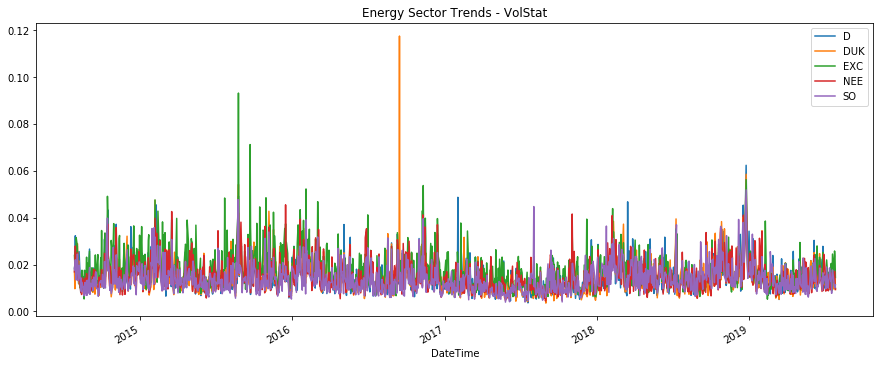

In [76]:
# Look at volatility regimes
fig, ax = plt.subplots(figsize=(15, 6))
agg_df.groupby("Symbol")["VolStat"].plot(
    ax=ax, legend=True, title="Energy Sector Trends - VolStat"
)

We notice that periods of high volatility tend to "clump" together; that is, periods of high volatility are not uniformly and randomly distributed across time, but tend to occur in highly concentrated bursts. This is an interesting insight that we could not gain by only looking at the data in tabular format. In future cases, you will dig deeper into the numerous graphing capabilities of Python and how to integrate them into your data science workflow.

### Exercise 9:

Write a script to find and print the month that has the highest average daily trading volume for each symbol. Also include the average volume value corresponding to that month. For example, symbol D has its highest average daily trading volume of 6.437 million in December 2018.

**Answer.**

-------

### Exercise 10:

We have so far looked at volatility grouped by stock symbol or by year and month. As our data covers several years, it's also interesting to group the data by calendar month, ignoring the year component (e.g. averaging together all Januarys). This allows us to see if some points of the year, on average, are more susceptible to volatile trading patterns.

Group the data by month (ignoring the year), and identify :

* The month with, on average, the highest volatility
* The month with, on average, the lowest volatility
* Any general patterns that you notice over the whole year

**Answer.**

-------

### Exercise 11:

The final point that we're interested in is looking at the days where:

* The return is high
* Trading volume is low

This indicates days where the price moved substantially but without much changing hands.

The thresholds that we are interested in are:
* Low volume: any day with a trading volume in the bottom 25th percentile
* High return: any day where the return is in the opt 75th percentile

Write the code necessary to:
* Calculate and add a "High/Low" variable for Volume Level (low is below 25th percentile)
* Calculate and add a "High/Low" variable for Return (high is above 75th percentile)

Describe what you see in terms of:
* How many rows fall into our "low volume" definition?
* How many rows fall into our "high return" definition?
* How many rows fall into the combination of high return with low volume definition?
* What are the 10 rows with the highest return but with low volume? What do you notice about these trades?

**Hint:** You can use the [sort_values()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) method in `pandas` to sort a DataFrame by a specific column.

**Answer.**

-------

## Conclusions

Having completed the analysis of the energy sector stock data, we have identified a number of interesting patterns relating volatility to trading volume. Specifically, we found that periods of high volatility also exhibit very high volume. This trend is consistent across all symbols.

We also saw that each stock exhibited "volatility clustering" – periods of high volatility tend to be clumped together. Each of the stocks experienced high volatility at relatively similar times which suggests some broader market factor may be affecting the energy sector.

## Takeaways

In this case, we've learned the foundations of the ```pandas``` library in Python. We now know how to:

1. Read data from CSV files
2. Aggregate and manipulate data using ```pandas```
3. Analyze summary statistics and gather information from trends across time
4. Use ```matplotlib``` to create plots for visual analysis

Going forward, we will be consistently using ```pandas``` as a data analysis framework (along with other tools) to build more complex projects and solve critical business problems. It is critical you become as familiar with ```pandas``` as possible and it is imperative that you continue researching/investigating new components of this library after the completion of this program. What we have taught here are only the essential basics of `pandas`; there is still a vast amount of power to the library that you will discover and utilize later on in your development as a data professional.

We highly recommend revisiting this case a few more times and going through it from beginning to end with no aid/answers. You should know the various DataFrame/Series methods we introduced here as well as how to carry out common operations on data, such as finding percentiles, before you consider yourself to have "mastered" this material.